In [7]:
import pandas as pd
import numpy as np
data = pd.read_csv('C:\\Users\\UTKARSH\\Desktop\\7th sem\\ML\\ML-LAB datasets\\covid.csv')
data.head()

,pc,wbc,mc,ast,bc,ldh,diagnosis
0,Low,Low,Low,High,Normal,Normal,True
1,Low,Low,Normal,High,Normal,High,True
2,Low,High,Normal,High,Normal,Normal,False
3,Low,High,Normal,High,High,Normal,True
4,Low,Normal,High,High,Normal,Normal,False


In [2]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
pc_encoded=le.fit_transform(data['pc'].values)
wbc_encoded=le.fit_transform(data['wbc'].values)
mc_encoded=le.fit_transform(data['mc'].values)
ast_encoded=le.fit_transform(data['ast'].values)
bc_encoded=le.fit_transform(data['bc'].values)
ldh_encoded=le.fit_transform(data['ldh'].values)
Y=le.fit_transform(data['diagnosis'].values)

X=np.array(list(zip(pc_encoded,wbc_encoded,mc_encoded,ast_encoded,bc_encoded,ldh_encoded)))

X

array([[1, 1, 1, 0, 1, 1],
       [1, 1, 2, 0, 1, 0],
       [1, 0, 2, 0, 1, 1],
       [1, 0, 2, 0, 0, 1],
       [1, 2, 0, 0, 1, 1],
       [1, 2, 2, 0, 1, 0],
       [2, 1, 1, 0, 1, 1],
       [2, 0, 2, 0, 1, 1],
       [2, 0, 2, 0, 0, 0],
       [2, 2, 0, 0, 1, 1],
       [2, 2, 0, 0, 1, 0],
       [0, 1, 1, 1, 1, 1],
       [0, 2, 0, 1, 1, 1],
       [0, 2, 0, 1, 0, 0],
       [0, 0, 2, 1, 1, 0],
       [1, 2, 0, 0, 0, 1],
       [2, 2, 0, 0, 0, 1],
       [0, 1, 1, 1, 1, 0],
       [2, 2, 2, 0, 1, 1],
       [2, 0, 2, 0, 1, 0],
       [2, 1, 2, 0, 1, 0],
       [1, 0, 2, 0, 0, 0],
       [1, 1, 1, 0, 0, 0],
       [0, 0, 2, 1, 1, 1],
       [0, 2, 2, 1, 1, 1]])

In [3]:
Y

array([1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0], dtype=int32)

In [4]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
model = MultinomialNB()

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y)
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)

print("Accuracy:",accuracy_score(Y_test, y_pred))

print("\nReport")
print(classification_report(Y_test,y_pred))

Accuracy: 0.8571428571428571

Report
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.80      0.89         5

    accuracy                           0.86         7
   macro avg       0.83      0.90      0.84         7
weighted avg       0.90      0.86      0.86         7



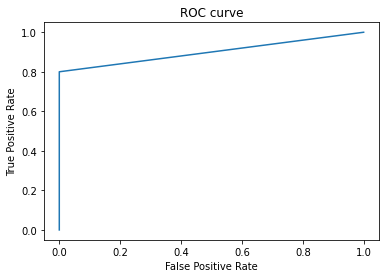

AUC of the prediction:0.9


In [6]:
import matplotlib.pyplot as plt
from sklearn import metrics
fpr,tpr,threshods=metrics.roc_curve(Y_test,y_pred,pos_label=1)
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve")
plt.show()


print("AUC of the prediction:{0}".format(metrics.auc(fpr,tpr)))